In [1]:
from sklearn.datasets._samples_generator import make_blobs
import matplotlib.pyplot as plt

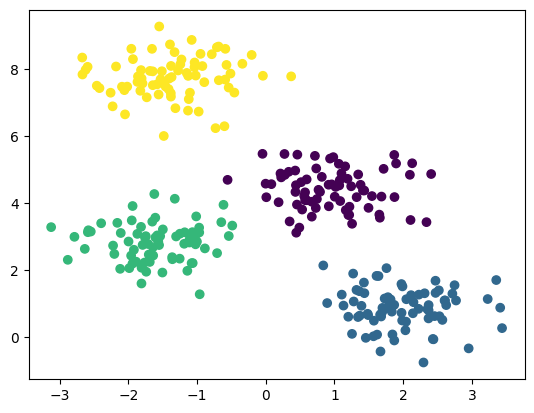

In [9]:
# DATA 1 : 합성데이터 (Synthetic Data)
x , y = make_blobs(n_samples=300,centers=4,cluster_std=0.6, random_state=0)
plt.scatter(x[:,0],x[:,1] , c = y)

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(x)

/Users/owo/anaconda3/envs/torchenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

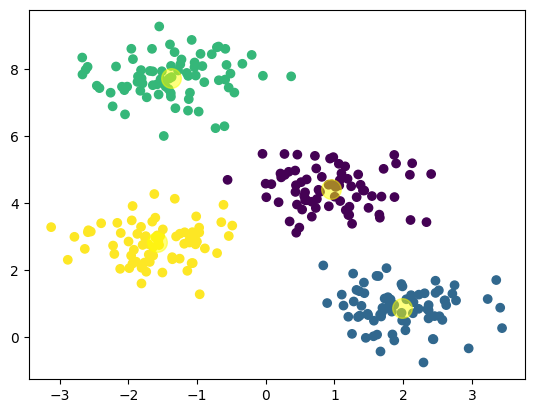

In [14]:
y_pred = kmeans.predict(x)

plt.scatter( x[:,0],x[:,1] , c = y_pred)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c = 'Yellow' , s = 200, alpha=0.5)

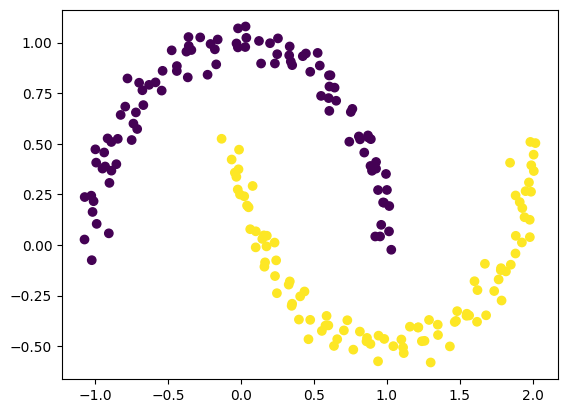

In [22]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

x,y = make_moons(n_samples=200,noise=0.05,random_state=0)
plt.scatter(x[:,0],x[:,1],c=y);

/Users/owo/anaconda3/envs/torchenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


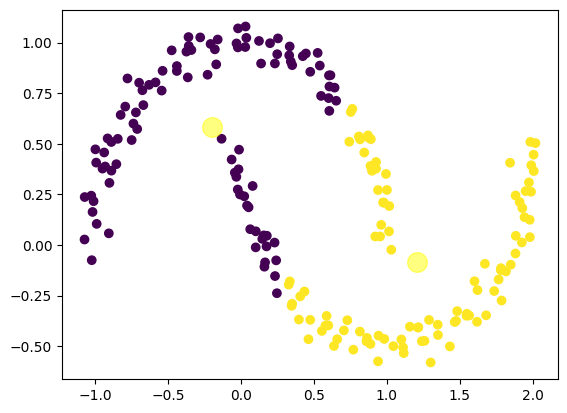

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(x)

y_pred = kmeans.predict(x)
plt.scatter(x[:,0],x[:,1],c=y_pred)

#center
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c = 'Yellow' , s = 200, alpha=0.5)

(1797, 64)
[0 1 2 ... 8 9 8]


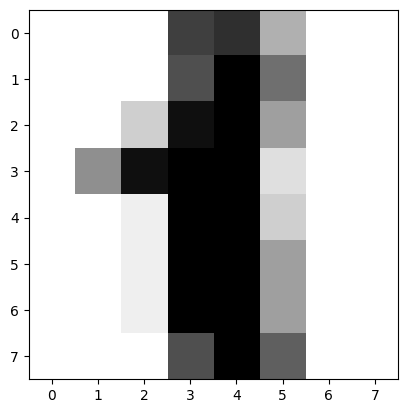

In [30]:
from sklearn.datasets import load_digits

digits = load_digits()

x = digits.data
y = digits.target

print(digits.data.shape)
print(digits.target)

img = digits.data.reshape(1797,8,8)
plt.imshow(img[1],cmap=plt.cm.binary)

/Users/owo/anaconda3/envs/torchenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


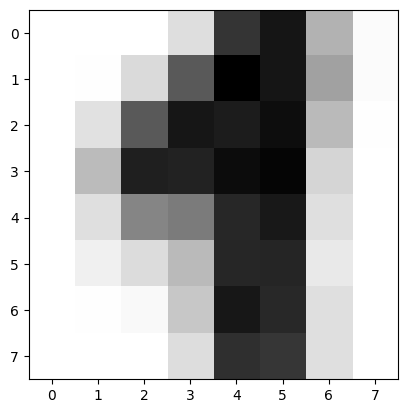

In [31]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(x)

centers = kmeans.cluster_centers_.reshape(10,8,8)
plt.imshow(centers[0],cmap=plt.cm.binary)

/Users/owo/anaconda3/envs/torchenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


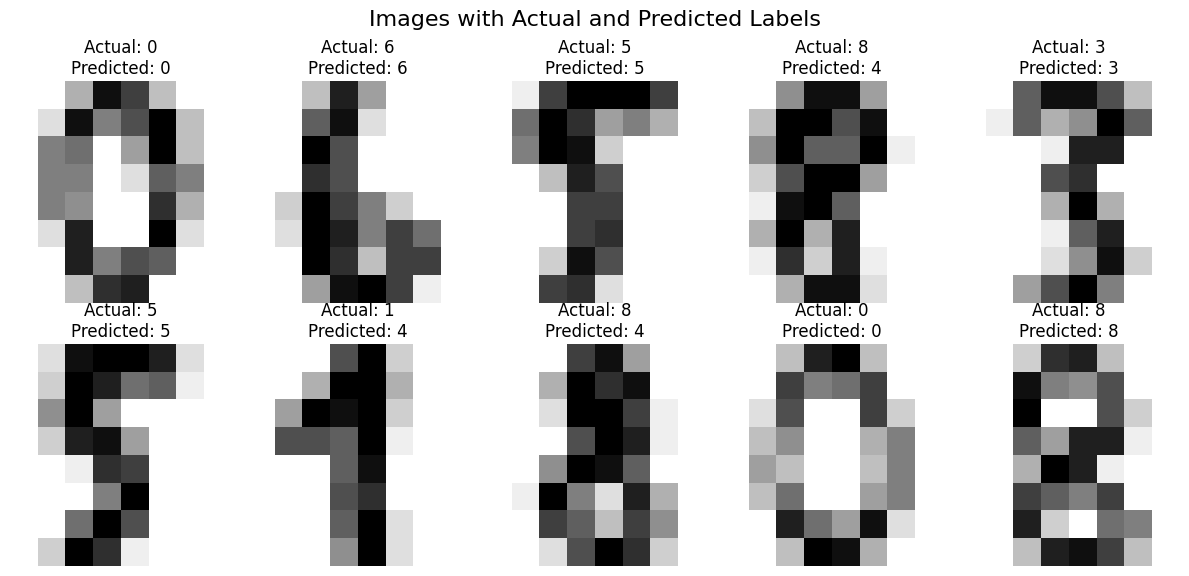

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Fit the K-means model to the digit data
kmeans.fit(x)

# Get the predicted cluster labels
y_pred = kmeans.predict(x)

# Map cluster labels to the true labels
label_mapping = {}
for cluster in range(10):
    mask = (y_pred == cluster)
    mapped_label = y[mask].mean().round().astype(int)
    label_mapping[cluster] = mapped_label

# Map the cluster labels to the true labels
mapped_labels = [label_mapping[cluster] for cluster in y_pred]

# Randomly select 10 indices
random_indices = np.random.choice(len(x), size=10, replace=False)

# Plot the images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle("Images with Actual and Predicted Labels", fontsize=16)

for i, index in enumerate(random_indices):
    image = x[index].reshape(8, 8)
    actual_label = y[index]
    predicted_label = mapped_labels[index]

    row = i // 5
    col = i % 5

    axes[row, col].imshow(image, cmap=plt.cm.binary)
    axes[row, col].set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()
